# Step1: Business Problem Understanding

Kidney stone prediction whether the persion was survived or not

In [1]:
#numpy it's an library where all the functions
#pandas it's an library where all  the functions
#matplotlib it,s an library it use to graphically represents 
#seaborn it,s an library it use to graphically represents 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#for import the data we use pandas by using (read_csv)
df=pd.read_csv(r'C:\Users\sumanth\Desktop\kidney_stone_data(classification) #Health.csv')
df

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1
...,...,...,...
695,B,small,0
696,B,small,1
697,B,small,1
698,A,large,1


# Step2: Data Understanding
How the data and what consists with in the data 

- treatment:Which type of treatment will done
- stone_size:size of the stone 
- success : the patient  will survived or not

In [3]:
#to check how many columns having inthe data set
df.columns

Index(['treatment', 'stone_size', 'success'], dtype='object')

In [4]:
#nunique identifies to find how many unique values 
df['treatment'].unique()


array(['B', 'A'], dtype=object)

In [5]:
df['treatment'].value_counts()

treatment
B    350
A    350
Name: count, dtype: int64

In [6]:
#nunique identifies to find how many unique values 
df['stone_size'].unique()


array(['large', 'small'], dtype=object)

In [7]:
df['stone_size'].value_counts()

stone_size
small    357
large    343
Name: count, dtype: int64

In [8]:
#nunique identifies to find how many unique values 
df['success'].unique()


array([1, 0], dtype=int64)

In [9]:
df['success'].value_counts()

success
1    562
0    138
Name: count, dtype: int64

In [10]:
#catogorize the data for doing exploration
discrete_cat=['treatment,stone_size']

In [11]:
#checking once the data types
df.dtypes

treatment     object
stone_size    object
success        int64
dtype: object

**Exploratory Data Analysis(EDA)**
#no need to apply

In [12]:
#no  need to check skewness,correlation,Outliers and plots

In [13]:
#checking null values
df.isnull().sum()
#here we found many missing values

treatment     0
stone_size    0
success       0
dtype: int64

 # Step3: Data Preprocessing

**1.Data Cleaning**
- Wrong data
- Missing values
- Wrong data type
- duplicates
- outliers
  
**2.Data Wrangling**
- transformation(applicable on continous)
- scaling(applicable on continous)
- encoding(applicable on discrete catagorical)
- Dont apply any Data Wrangling technique on Count variables

In [14]:
#(Encoding)
#Encoding we have to do label encoading (dummy encoading)
df = pd.get_dummies(df,columns=['treatment'], drop_first=True)
df= pd.get_dummies(df,columns=['stone_size'], drop_first=True)



In [15]:
df

,success,treatment_B,stone_size_small
0,1,True,False
1,1,False,False
2,0,False,False
3,1,False,False
4,1,False,False
...,...,...,...
695,0,True,True
696,1,True,True
697,1,True,True
698,1,False,False


In [16]:
#(X&Y)
#processing the data save the columns as x&y
#here we take all the columns as i/p variables
x=df.drop('success',axis=1)
#here we take 'Loan_Status' as the o/p variables
y=df['success']

In [17]:
#(train-test split)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)
#here with in the data we split the 80% of data for train and remining 20% of data for test 

 # Step4: Modelling & Evolution

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier             # KNeighborsRegressor
from sklearn.svm import SVC                                    # SVR     
from sklearn.tree import DecisionTreeClassifier                # DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier            # RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier        # GradientBoostRegressor
#from xgboost import XGClassifier                               #XGRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

**1.Logistic Regression**

In [19]:
#here no one can be provide thresold value so that prdefined threshold value is 0.5
#Modelling
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(x_train,y_train)
#it will calculate probality ehere the probability was >0.5 as class'1' and <0.5 as class'0'

#prediction & Evolution on train data
ypred_train=LR_model.predict(x_train)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(LR_model,x_train,y_train,cv=5,scoring='accuracy').mean())

#prediction & Evolution on test data
ypred_test=LR_model.predict(x_test)

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


In [20]:
#checking the confusion matrix how they correctedly  
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

#checking overall classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[  0  32]
 [  0 108]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.77      1.00      0.87       108

    accuracy                           0.77       140
   macro avg       0.39      0.50      0.44       140
weighted avg       0.60      0.77      0.67       140



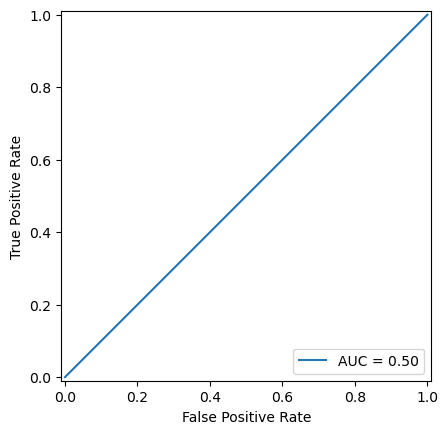

In [21]:
#AUC Cureve(Area Under the Curve)higher the accuracy batter the model
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

In [22]:
#AUC Score,(Area Under the Curve score)higher the accuracy batter the model
from sklearn.metrics import roc_auc_score
print('auc score',roc_auc_score(y_test,ypred_test))

auc score 0.5


**2.KNN**

In [23]:
#Hyperperameter tunning(trying the different values)
#increasing to the higher parameter
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator, param_grid,scoring='accuracy',cv=5)
knn_grid.fit(x_train,y_train)

knn_grid.best_estimator_
#it will identify the nearest neighbors and with the p value the (p1 belongs to manhaten,p2 belongs to eculuven )

KNeighborsClassifier(n_neighbors=11, p=1)

In [24]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors=11,p=1)
KNN_model.fit(x_train,y_train)
#it will calculate 

#prediction & Evolution on train data
ypred_train=KNN_model.predict(x_train)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(KNN_model,x_train,y_train,cv=5,scoring='accuracy').mean())

#prediction & Evolution on test data
ypred_test=KNN_model.predict(x_test)

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


In [25]:
#here no need to check confusion matrix becoz we focus on accuracy if we focus on precission or recall we hav to check confusion matrix

**3.SVM**

In [26]:
#Hyperperameter tunning(trying the different values)
#increasing to the higher parameter
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','ploy']}
svm_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(x_train,y_train)
#c it gives number of support vectors
#kernel it select the lines we have the lines are('linear','rbf','sigmoid','ploy')

svm_grid.best_estimator_


SVC(C=0.01, kernel='linear')

In [27]:
#Modelling
from sklearn.svm import SVC
SVM_model=svm_grid.best_estimator_
SVM_model.fit(x_train,y_train)
#it will calculate 

#prediction & Evolution on train data
ypred_train=SVM_model.predict(x_train)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(SVM_model,x_train,y_train,cv=5,scoring='accuracy').mean())

#prediction & Evolution on test data
ypred_test=SVM_model.predict(x_test)

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


**4.Decision Tree**

In [28]:
#hyperperameter tunning means in here  we do prunning
#*first create deafult DT model (fully grown tree without any prunning),so that ,we can unfderastanding the max_deplth

In [29]:
#Modelling,before the prunning or identify the depth of the tree based on that create a new model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=True)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

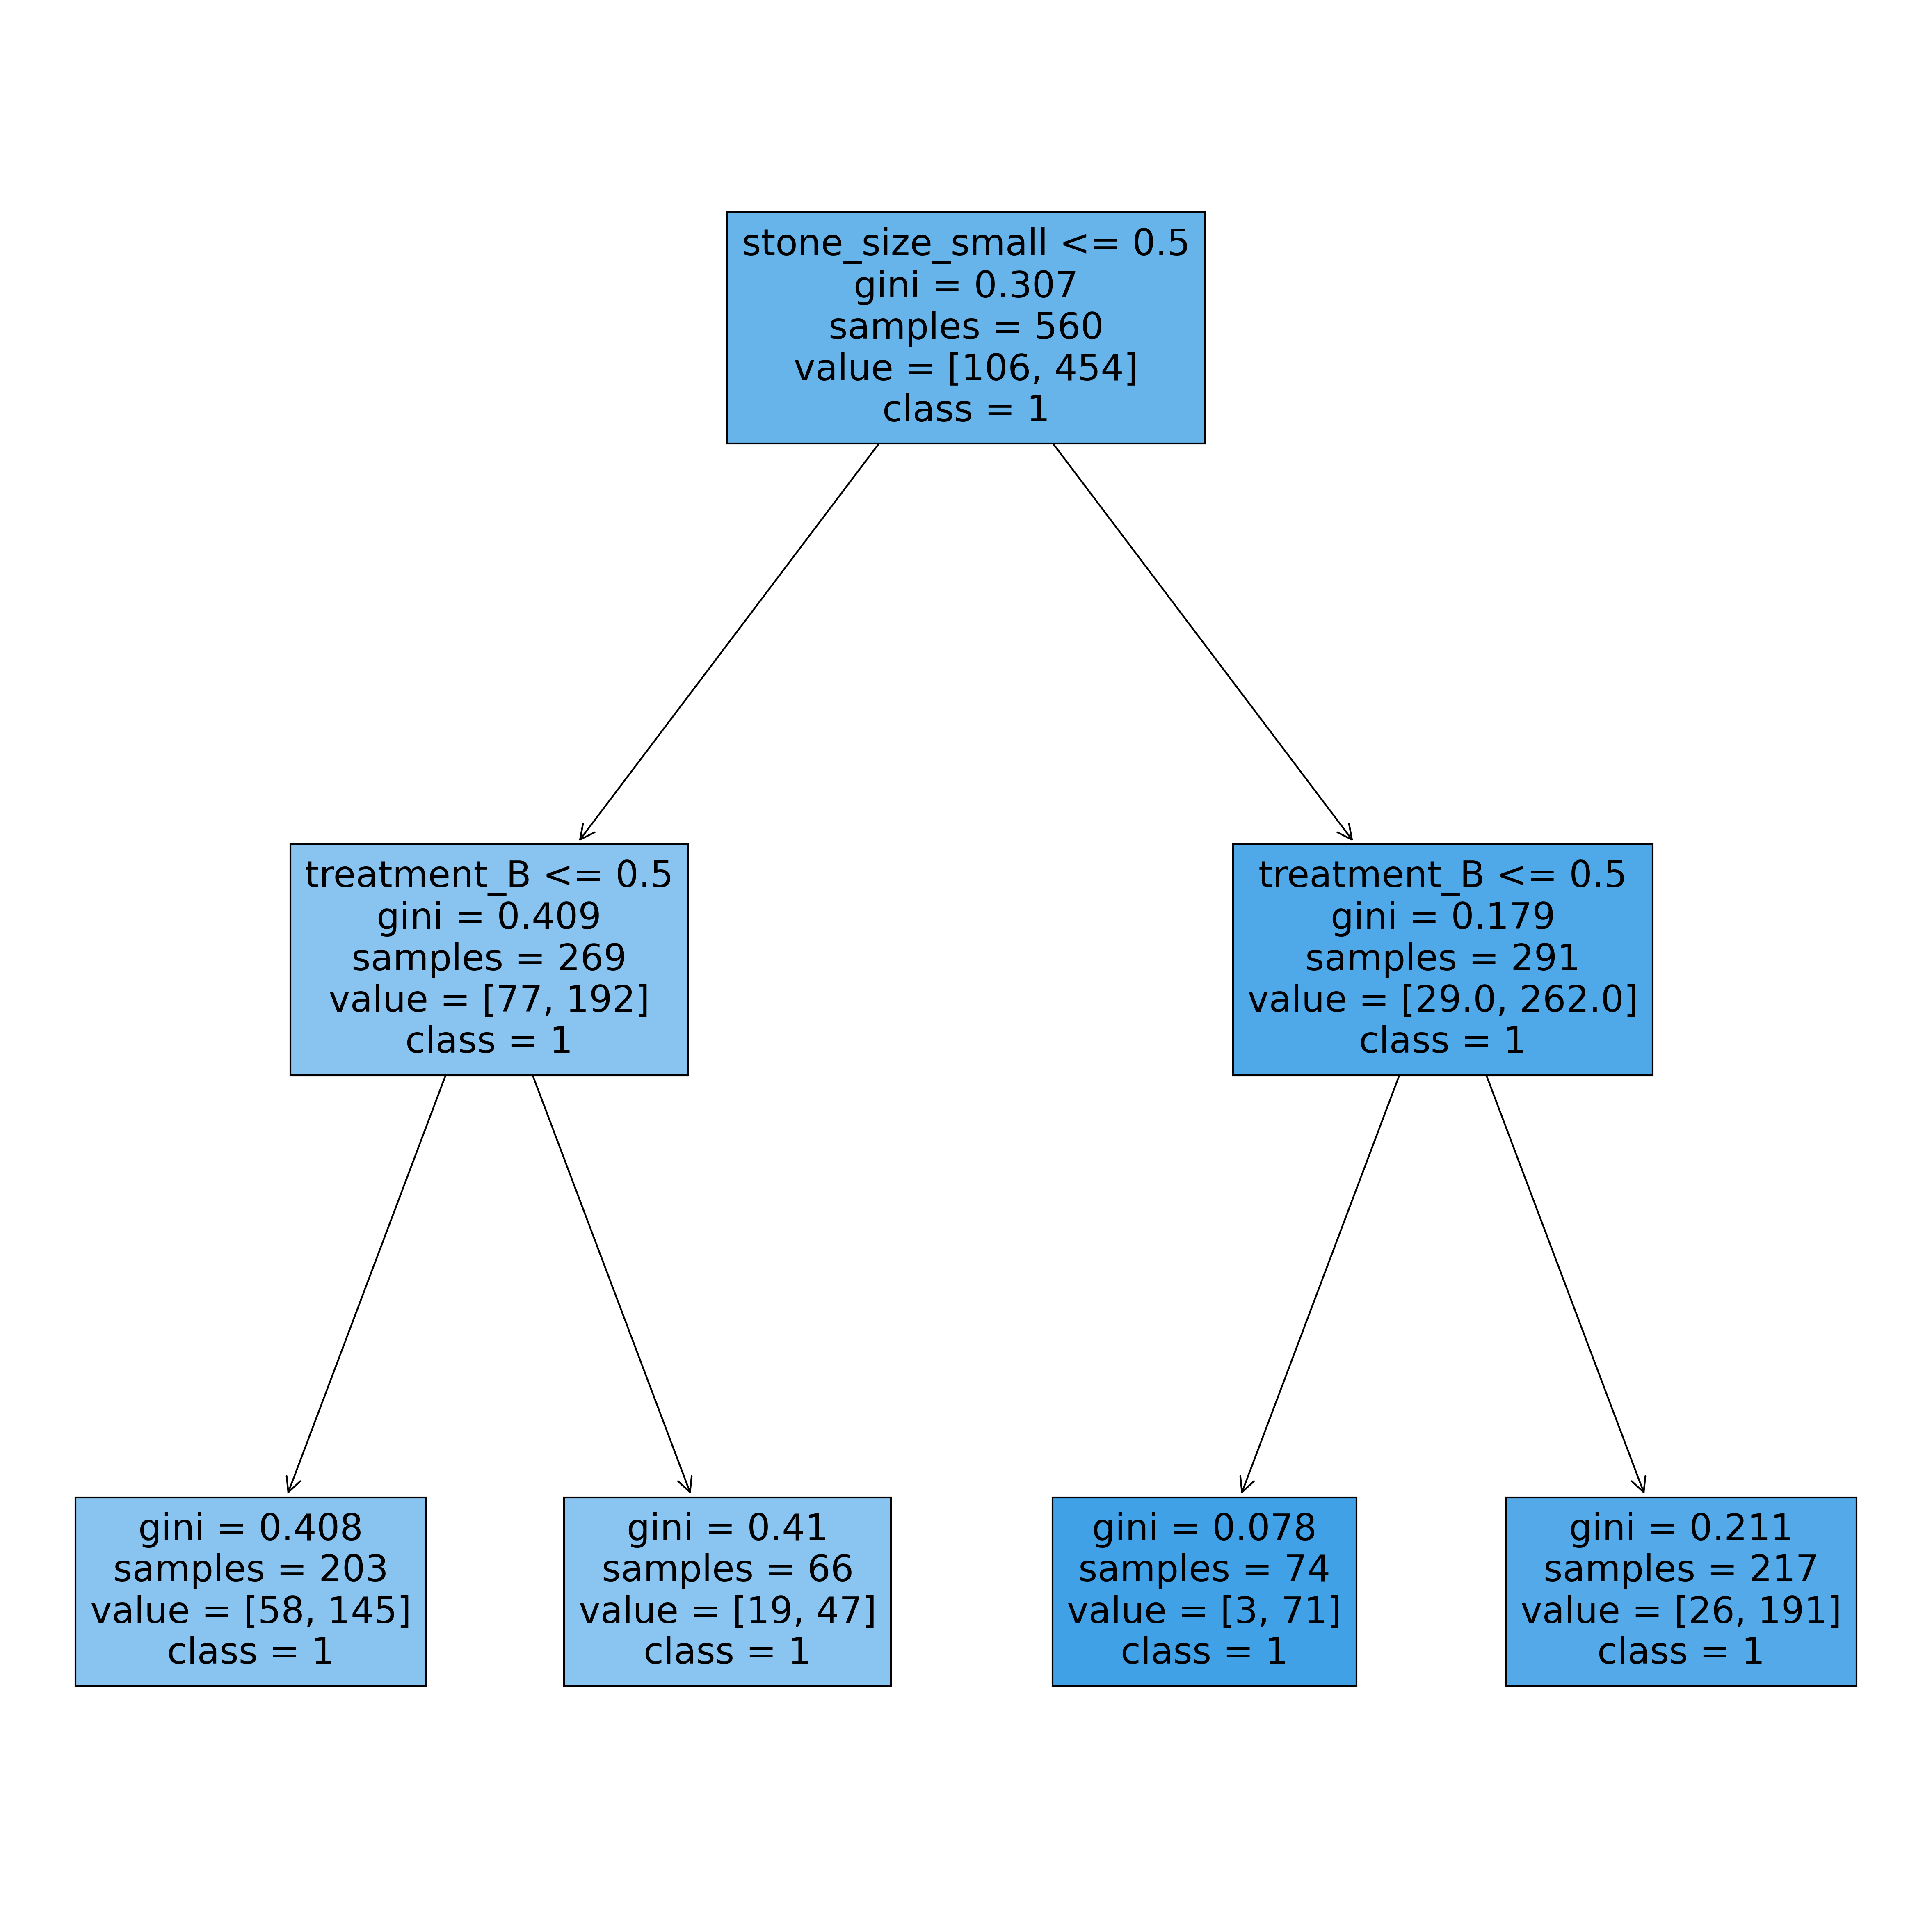

In [30]:
#watching the decision tree in a graphical way 

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(dtc,filled=True,
          feature_names=x_train.columns.tolist(),
          class_names=['0','1'])
plt.show()

In [31]:
#Hyperperameter tunning 
estimator=DecisionTreeClassifier(random_state=True)

param_grid={'criterion':['gini','entropy'],
           'max_depth':list(range(1,15))}

dtc_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dtc_grid.fit(x_train,y_train)

dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=True)

In [32]:
#modelling
dt=DecisionTreeClassifier(max_depth=1,random_state=True)
dt.fit(x_train,y_train)

#prediction & evolution on train data
ypred_train=dt.predict(x_train)
#prediction & Evolution on test data
ypred_test=dt.predict(x_test)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy',accuracy_score(y_train,ypred_train))
                                      
#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(dt,x_train,y_train,scoring='accuracy',cv=5).mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


In [33]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
dt.feature_importances_

array([0., 1.])

In [34]:
#important features identifying and then converted as data frame
feat_df=pd.DataFrame(data=dt.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_df

,Importance
treatment_B,0.0
stone_size_small,1.0


In [35]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_dt=feat_df[feat_df["Importance"]>0].index.tolist()
important_features_dt

['stone_size_small']

In [36]:

#selected imp features for train and test data
x_train_dt=x_train[important_features_dt]
x_test_dt=x_test[important_features_dt]

#selecting best estimator for (modelling)
dt=dtc_grid.best_estimator_
dt.fit(x_train_dt,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=dt.predict(x_train_dt)
ypred_test=dt.predict(x_test_dt)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(dt,x_train_dt,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


**5.Random Forest**

In [37]:
#Hyperperameter tunning 
estimator=RandomForestClassifier(random_state=True)

param_grid={'n_estimators':list(range(1,100))}

rf_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(x_train,y_train)

rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=1, random_state=True)

In [38]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
rf.feature_importances_

array([0.45266551, 0.54733449])

In [39]:
#important features identifying and then converted as data frame
feat_rf=pd.DataFrame(data=rf.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_rf

,Importance
treatment_B,0.452666
stone_size_small,0.547334


In [40]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_rf=feat_rf[feat_rf["Importance"]>0].index.tolist()
important_features_rf

['treatment_B', 'stone_size_small']

In [41]:
#selected imp features for train and test data
x_train_rf=x_train[important_features_rf]
x_test_rf=x_test[important_features_rf]

#selecting best estimator for (modelling)
rf=rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=rf.predict(x_train_rf)
ypred_test=rf.predict(x_test_rf)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(rf,x_train_rf,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


**6.AdaBoost**

In [42]:
#Hyperperameter tunning 
estimator=AdaBoostClassifier(random_state=True)

param_grid={'n_estimators':list(range(1,50))}

ab_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(x_train,y_train)

ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=1, random_state=True)

In [43]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
ab.feature_importances_

array([0., 1.])

In [44]:
#important features identifying and then converted as data frame
feat_ab=pd.DataFrame(data=ab.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_ab

,Importance
treatment_B,0.0
stone_size_small,1.0


In [45]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_ab=feat_ab[feat_ab["Importance"]>0].index.tolist()
important_features_ab

['stone_size_small']

In [46]:
#selected imp features for train and test data
x_train_ab=x_train[important_features_ab]
x_test_ab=x_test[important_features_ab]

#selecting best estimator for (modelling)
ab=ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=ab.predict(x_train_ab)
ypred_test=ab.predict(x_test_ab)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(ab,x_train_ab,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


**7.Gradent Boost**

In [47]:
#Hyperperameter tunning 
from sklearn.ensemble import GradientBoostingClassifier

estimator=GradientBoostingClassifier(random_state=True)

param_grid={'n_estimators':list(range(1,10)),
           'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
#how much error it going to rectifing on each and every column is  known learning rate it should be(0-1)
gb_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(x_train,y_train)

gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=1, random_state=True)

In [48]:
#after the modelling we do the feature importances to know the importances of features depends on drop unimportant features 
gb.feature_importances_

array([0.06656119, 0.93343881])

In [49]:
#important features identifying and then converted as data frame
feat_gb=pd.DataFrame(data=gb.feature_importances_,
                    index=x.columns,
                    columns=['Importance'])
feat_gb

,Importance
treatment_B,0.066561
stone_size_small,0.933439


In [50]:
#Dropping the remimining features which has >0 & identify the imp features
important_features_gb=feat_gb[feat_gb["Importance"]>0].index.tolist()
important_features_gb

['treatment_B', 'stone_size_small']

In [51]:
#selected imp features for train and test data
x_train_gb=x_train[important_features_gb]
x_test_gb=x_test[important_features_gb]

#selecting best estimator for (modelling)
gb=gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

#prediction on imp features for train and test(evolution)
ypred_train=gb.predict(x_train_gb)
ypred_test=gb.predict(x_test_gb)

#calculate train accuracy b/w y_train and ypred_train
print('train accuracy:',accuracy_score(y_train,ypred_train))

#calculate cross validation for every fold we calculate accuracy we get 5 accuracy and take the avg of 5 accuracy
print('cv score:',cross_val_score(gb,x_train_ab,y_train,cv=5,scoring='accuracy').mean())

#calculate test accuracy b/w y_test and ypred_test
print('test accuracy:',accuracy_score(y_test,ypred_test))

train accuracy: 0.8107142857142857
cv score: 0.8107142857142857
test accuracy: 0.7714285714285715


In [52]:
#here all the algorithms are gives same accuracy for that we go with Logistic Regression